In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
from keras.constraints import maxnorm
from keras import optimizers

In [2]:
# Function to create model, required for KerasClassifier
def create_model1(neurons=9):
    model1 = Sequential()
    model1.add(Dense(neurons, input_dim=9, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model1.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model1

In [3]:
seed=84

In [4]:
np.random.seed(seed)

In [5]:
import pandas as pd
df = pd.read_csv("wbc.csv")

In [6]:
df=df.replace('?',np.nan)
df['bare_nuclei'] = pd.to_numeric(df.bare_nuclei.fillna(df.bare_nuclei.median()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness       699 non-null int64
cell_size             699 non-null int64
cell_shape            699 non-null int64
marginal_adhesion     699 non-null int64
epitelial_cellsize    699 non-null int64
bare_nuclei           699 non-null float64
bland_chromatin       699 non-null int64
normal_nucleoli       699 non-null int64
mitoses               699 non-null int64
jenis                 699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [7]:
X = df.drop([df.columns[-1]], axis=1)
y = df.jenis.map({2: 0, 4: 1})

In [8]:
print (type(X))
print (type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [10]:

print (type(y_train))
print (type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [11]:
X_train

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epitelial_cellsize,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
654,3,1,1,1,2,1.0,3,1,1
658,7,8,8,7,3,10.0,7,2,3
148,3,1,1,3,8,1.0,5,8,1
163,1,1,1,2,1,3.0,1,1,7
199,3,1,1,1,2,1.0,2,1,1
261,5,10,10,6,10,10.0,10,6,5
174,8,6,5,4,3,10.0,6,1,1
282,1,4,3,10,4,10.0,5,6,1
23,8,4,5,1,2,1.0,7,3,1
457,8,8,9,6,6,3.0,10,10,1


In [12]:
y_train

654    0
658    1
148    0
163    0
199    0
261    1
174    1
282    1
23     1
457    1
300    1
635    0
540    0
137    0
474    0
552    0
631    0
598    0
292    1
321    0
419    0
454    0
471    0
539    0
685    0
398    0
330    1
491    1
555    0
532    0
      ..
410    0
496    0
145    0
570    1
140    0
340    1
379    0
599    0
386    1
308    1
452    0
324    0
302    1
493    1
304    1
510    0
64     0
328    1
124    1
57     1
77     0
469    0
673    0
238    1
576    0
109    1
206    1
380    0
501    0
312    1
Name: jenis, dtype: int64

In [10]:
model = KerasClassifier(build_fn=create_model1, class_weight=None, verbose=0)

In [11]:
neurons = [9,18,27,36,45,54,63,72,81,90,99,108,117,126,135,144,153,162]

In [12]:
param_grid = dict(neurons=neurons)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
def cost_breast_cancer(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    FN = CM[1][0]
    FP = CM[0][1]
    costBC=((228.35*FP)+(2850000*FN))
    return costBC

In [15]:
def specificity(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    nilai=(TN/(FP+TN))
    return nilai

In [16]:
from sklearn.metrics import make_scorer
my_custom_scorer=make_scorer(cost_breast_cancer, greater_is_better=False)
score_specificity=make_scorer(specificity, greater_is_better=True)

In [17]:
from sklearn.model_selection import GridSearchCV

In [21]:
print(__doc__)


scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, 
                       scoring='accuracy')
    clf.fit(X_train.as_matrix(), y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.4f (+/-%0.04f) for %r"
              % (mean, std * 2, params))
    print()
    


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'neurons': 153}

Grid scores on development set:

0.9402 (+/-0.0756) for {'neurons': 9}
0.9444 (+/-0.0691) for {'neurons': 18}
0.9487 (+/-0.0664) for {'neurons': 27}
0.9509 (+/-0.0713) for {'neurons': 36}
0.9487 (+/-0.0937) for {'neurons': 45}
0.9637 (+/-0.0690) for {'neurons': 54}
0.9615 (+/-0.0803) for {'neurons': 63}
0.9487 (+/-0.0855) for {'neurons': 72}
0.9551 (+/-0.0697) for {'neurons': 81}
0.9615 (+/-0.0653) for {'neurons': 90}
0.9637 (+/-0.0713) for {'neurons': 99}
0.9551 (+/-0.0903) for {'neurons': 108}
0.9615 (+/-0.0653) for {'neurons': 117}
0.9402 (+/-0.0928) for {'neurons': 126}
0.9637 (+/-0.0875) for {'neurons': 135}
0.9487 (+/-0.0858) for {'neurons': 144}
0.9658 (+/-0.0608) for {'neurons': 153}
0.9658 (+/-0.0790) for {'neurons': 162}



In [22]:
print("Best score cost obtained: {0}".format(clf.best_score_))
print("Parameters:")
for key, value in clf.best_params_.items():
    print("\t{}: {}".format(key, value))

Best score cost obtained: 0.9658119658119658
Parameters:
	neurons: 153


In [18]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(9,5))
plt.plot(neurons, means, marker='o')
plt.title("Akurasi vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.grid(True)
plt.show()

NameError: name 'means' is not defined

In [15]:
neurons2 = [9,18,27,36,45,54,63,72,81]

In [25]:
param_grid2 = dict(neurons=neurons2)

In [26]:
print(__doc__)


scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf2 = GridSearchCV(estimator=model, param_grid=param_grid2, cv=10, 
                       scoring='accuracy')
    clf2.fit(X_train.as_matrix(), y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf2.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means2 = clf2.cv_results_['mean_test_score']
    stds2 = clf2.cv_results_['std_test_score']
    for mean, std, params in zip(means2, stds2, clf2.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'neurons': 81}

Grid scores on development set:

0.947 (+/-0.064) for {'neurons': 9}
0.940 (+/-0.068) for {'neurons': 18}
0.955 (+/-0.082) for {'neurons': 27}
0.964 (+/-0.054) for {'neurons': 36}
0.949 (+/-0.064) for {'neurons': 45}
0.940 (+/-0.097) for {'neurons': 54}
0.964 (+/-0.076) for {'neurons': 63}
0.951 (+/-0.087) for {'neurons': 72}
0.968 (+/-0.072) for {'neurons': 81}



c:\users\annisa\anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


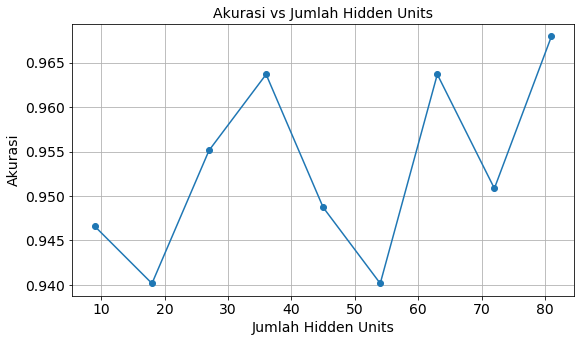

In [27]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(9,5))
plt.plot(neurons2, means2, marker='o')
plt.title("Akurasi vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.grid(True)
plt.show()

In [28]:
dfb = pd.read_csv("wbc.csv")
dfb=dfb[dfb.bare_nuclei!='?']
dfb['bare_nuclei']=dfb['bare_nuclei'].astype(object).astype(int)

In [29]:
A = dfb.drop([dfb.columns[-1]], axis=1)
b = dfb.jenis.map({2: 0, 4: 1})

In [30]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.33, random_state=seed)

In [31]:
print(__doc__)


scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf3 = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, 
                       scoring='accuracy')
    clf3.fit(A_train.as_matrix(), b_train)

    print("Best parameters set found on development set:")
    print()
    print(clf3.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means3 = clf3.cv_results_['mean_test_score']
    stds3 = clf3.cv_results_['std_test_score']
    for mean, std, params in zip(means3, stds3, clf3.cv_results_['params']):
        print("%0.4f (+/-%0.04f) for %r"
              % (mean, std * 2, params))
    print()
    


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'neurons': 81}

Grid scores on development set:

0.9409 (+/-0.0617) for {'neurons': 9}
0.9453 (+/-0.0653) for {'neurons': 18}
0.9519 (+/-0.0507) for {'neurons': 27}
0.9606 (+/-0.0722) for {'neurons': 36}
0.9519 (+/-0.0989) for {'neurons': 45}
0.9584 (+/-0.0789) for {'neurons': 54}
0.9584 (+/-0.0739) for {'neurons': 63}
0.9519 (+/-0.0949) for {'neurons': 72}
0.9694 (+/-0.0733) for {'neurons': 81}
0.9562 (+/-0.0993) for {'neurons': 90}
0.9694 (+/-0.0590) for {'neurons': 99}
0.9497 (+/-0.1012) for {'neurons': 108}
0.9694 (+/-0.0651) for {'neurons': 117}
0.9628 (+/-0.0646) for {'neurons': 126}
0.9606 (+/-0.0723) for {'neurons': 135}
0.9606 (+/-0.1245) for {'neurons': 144}
0.9650 (+/-0.0522) for {'neurons': 153}
0.9584 (+/-0.0963) for {'neurons': 162}



c:\users\annisa\anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


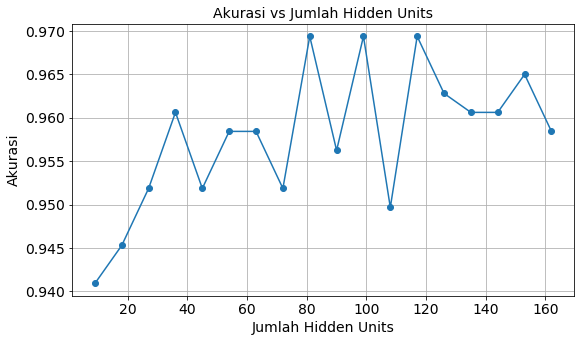

In [32]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(9,5))
plt.plot(neurons, means3, marker='o')
plt.title("Akurasi vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.grid(True)
plt.show()

In [33]:
print(__doc__)


scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf4 = GridSearchCV(estimator=model, param_grid=param_grid2, cv=10, 
                       scoring='accuracy')
    clf4.fit(A_train.as_matrix(), b_train)

    print("Best parameters set found on development set:")
    print()
    print(clf4.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means4 = clf4.cv_results_['mean_test_score']
    stds4 = clf4.cv_results_['std_test_score']
    for mean, std, params in zip(means4, stds4, clf4.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'neurons': 63}

Grid scores on development set:

0.950 (+/-0.062) for {'neurons': 9}
0.961 (+/-0.061) for {'neurons': 18}
0.947 (+/-0.065) for {'neurons': 27}
0.961 (+/-0.070) for {'neurons': 36}
0.961 (+/-0.101) for {'neurons': 45}
0.954 (+/-0.056) for {'neurons': 54}
0.967 (+/-0.065) for {'neurons': 63}
0.947 (+/-0.123) for {'neurons': 72}
0.956 (+/-0.070) for {'neurons': 81}



c:\users\annisa\anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


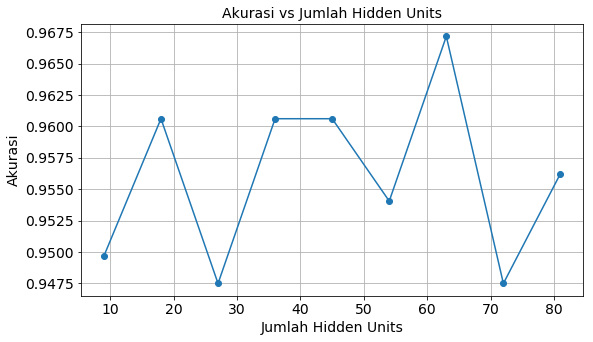

In [34]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(9,5))
plt.plot(neurons2, means4, marker='o')
plt.title("Akurasi vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.grid(True)
plt.show()

In [35]:
means

array([ 0.94017094,  0.94444444,  0.94871795,  0.9508547 ,  0.94871795,
        0.96367521,  0.96153846,  0.94871795,  0.95512821,  0.96153846,
        0.96367521,  0.95512821,  0.96153846,  0.94017094,  0.96367521,
        0.94871795,  0.96581197,  0.96581197])

In [36]:
means3

array([ 0.94091904,  0.9452954 ,  0.95185996,  0.96061269,  0.95185996,
        0.95842451,  0.95842451,  0.95185996,  0.96936543,  0.95623632,
        0.96936543,  0.94967177,  0.96936543,  0.96280088,  0.96061269,
        0.96061269,  0.96498906,  0.95842451])

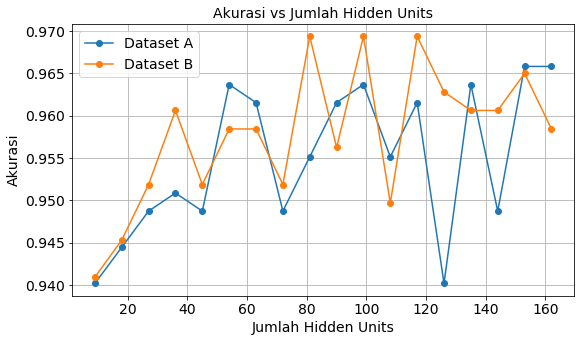

In [37]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(neurons, means, marker='o', label='Dataset A')
ax.plot(neurons, means3, marker='o',  label='Dataset B')
plt.title("Akurasi vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.grid(True)
plt.show()

In [47]:
means2.shape

(9,)

In [51]:
means81=means2

In [48]:
means4.shape

(9,)

In [2]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(neurons2, means2, marker='o', color='blue', label='Dataset A')
ax.plot(neurons2, means4, marker='^', color='orange', label='Dataset B')
plt.title("Akurasi vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [55]:
X_train.count()

clump_thickness       468
cell_size             468
cell_shape            468
marginal_adhesion     468
epitelial_cellsize    468
bare_nuclei           468
bland_chromatin       468
normal_nucleoli       468
mitoses               468
dtype: int64

In [26]:
means4=[0.950, 0.961, 0.947, 0.961, 0.961, 0.954, 0.967, 0.947, 0.956]
means2=[0.947, 0.940, 0.955, 0.964, 0.949, 0.940, 0.964, 0.951, 0.968]

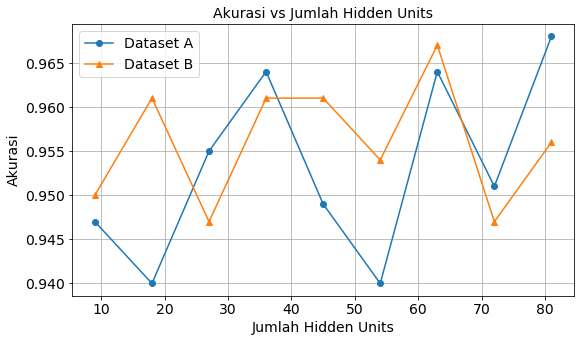

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(neurons2, means2, marker='o', label='Dataset A')
ax.plot(neurons2, means4, marker='^', label='Dataset B')
plt.title("Akurasi vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.grid(True)
plt.show()